In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


# Step 1: Load and Preprocess Data

with open('Bakery.csv', 'r') as file:
    transactions = [line.strip().split(',') for line in file if line.strip()]

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [3]:
# Step 2: Apply FP-growth Algorithm

# Identify frequent itemsets with a minimum support of 30% (0.3)
frequent_itemsets = fpgrowth(df, min_support=0.3, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support              itemsets
0  0.409791             (Morning)
1  0.375463             (Weekend)
2  0.564121           (Afternoon)
3  0.624488             (Weekday)
4  0.354642  (Weekday, Afternoon)


In [4]:
# Step 3: Generate Association Rules

# Generate rules with a minimum confidence of 50% (0.5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the key metrics: support, confidence, and lift
print("\nAssociation Rules (Support, Confidence, Lift):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules (Support, Confidence, Lift):
   antecedents  consequents   support  confidence      lift
0    (Weekday)  (Afternoon)  0.354642    0.567893  1.006685
1  (Afternoon)    (Weekday)  0.354642    0.628663  1.006685


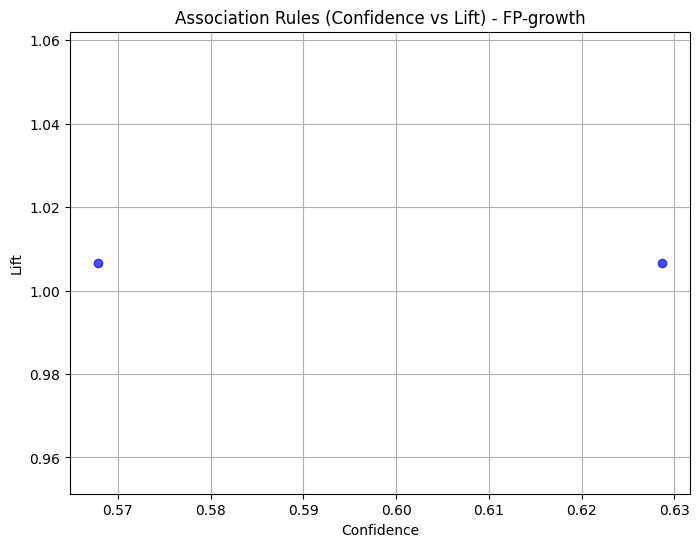

In [5]:
# Step 4: Visualize the Association Rules

plt.figure(figsize=(8, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, color='blue')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules (Confidence vs Lift) - FP-growth')
plt.grid(True)
plt.show()